In [ ]:
# Define SI unit prefixes
nm = nHz = nA = nV = nW = 1e-9
um = uHz = uA = uV = uW = 1e-6
mm = mHz = mA = mV = mW = 1e-3
cm = 1e-2
Hz = A = V = W = 1
kHz = kA = kV = kW = 1e3
MHz = MA = MV = MW = 1e6
GHz = GA = GV = GW = 1e9

Scale factor at MOT location: 0.224332 mm/px
95% CI over MOT ±4 mm:
→ Min scale factor: 0.214642 mm/px
→ Max scale factor: 0.234330 mm/px


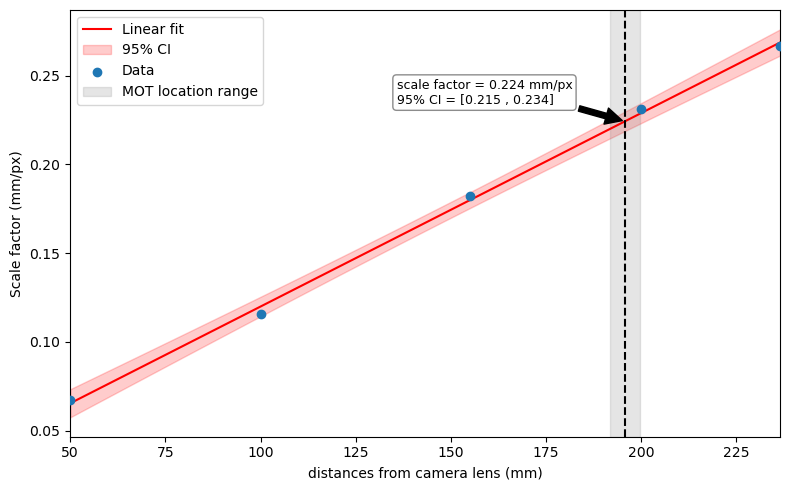

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import t

# Data - distances is distances from camera lens (mm) and scale_factors is scale factor (mm/px)
distances = np.array([50, 100, 155, 200, 236.5])
scale_factors = np.array([0.067, 0.116, 0.182, 0.231, 0.267])
n = len(distances)
dof = n - 2  # degrees of freedom

# Fit linear regression
result = stats.linregress(distances, scale_factors)
slope = result.slope
intercept = result.intercept

# Predicted values
x_fit = np.linspace(min(distances), max(distances), 200)
y_fit = intercept + slope * x_fit

# Calculate standard error of regression
residuals = scale_factors - (intercept + slope * distances)
s_err = np.sqrt(np.sum(residuals**2) / dof)

# Confidence interval bounds
t_val = t.ppf(1 - 0.025, dof)  # 95% CI
mean_x = np.mean(distances)
conf_interval = (
    t_val * s_err * np.sqrt(1 / n + (x_fit - mean_x) ** 2 / np.sum((distances - mean_x) ** 2))
)

# MOT location info
MOT_location = (155 + 236.5) / 2  # middle of the coils
MOT_location_err = 4  # estimated error
scale_factor = slope * MOT_location + intercept

# Evaluate 95% CI across MOT location range
mot_x_range = np.linspace(
    MOT_location - MOT_location_err, MOT_location + MOT_location_err, 200
)
mot_ci = (
    t_val
    * s_err
    * np.sqrt(1 / n + (mot_x_range - mean_x) ** 2 / np.sum((distances - mean_x) ** 2))
)
# Find min and max within this range
min_scale = np.min(intercept + slope * mot_x_range - mot_ci)
max_scale = np.max(intercept + slope * mot_x_range + mot_ci)

print(f"Scale factor at MOT location: {scale_factor:.6f} mm/px")
print(f"95% CI over MOT ±{MOT_location_err} mm:")
print(f"→ Min scale factor: {min_scale:.6f} mm/px")
print(f"→ Max scale factor: {max_scale:.6f} mm/px")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_fit, y_fit, "r-", label="Linear fit")
plt.fill_between(x_fit, y_fit - conf_interval, y_fit + conf_interval, color="r", alpha=0.2, label="95% CI")
plt.scatter(distances, scale_factors, label="Data", zorder=5)

# Shade MOT location uncertainty band
plt.axvspan(
    MOT_location - MOT_location_err,
    MOT_location + MOT_location_err,
    color="gray",
    alpha=0.2,
    label="MOT location range",
)
plt.axvline(x=MOT_location, color="k", linestyle="--")

# Annotate central MOT scale factor
plt.annotate(
    f"scale factor = {scale_factor:.3f} mm/px\n95% CI = [{min_scale:.3f} , {max_scale:.3f}]",
    xy=(MOT_location, scale_factor),
    xytext=(MOT_location - 60, scale_factor + 0.01),
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9),
)

plt.xlabel("distances from camera lens (mm)")
plt.xlim(min(distances), max(distances))
plt.ylabel("Scale factor (mm/px)")
plt.legend()
plt.tight_layout()
plt.show()